In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
print(coordinates)

[(-35.11416998886147, 35.41649393991517), (-65.94587438810305, -161.23276019664502), (61.636015268333864, 72.70771468596095), (60.80410193506799, 47.1537580831712), (-84.16154868118288, -112.46351749518938), (-10.467575096360704, 40.189735354630045), (60.553539022966504, -175.58448906768922), (-48.75620205806762, -94.23253696307702), (62.88763069088728, 59.7008214914687), (-73.6921059365362, -7.281216983733287), (13.198628508301582, 47.58361094632522), (-50.1840272043446, -165.20525977136222), (67.60084676075999, -94.52445480784449), (44.665519522175316, -96.01285722204923), (7.0391155995595796, -138.14771548722783), (48.538351711285344, -40.80635349566333), (2.419544010812359, 171.29064319508547), (-61.9289887702603, -18.20046809337458), (20.79788897914051, -134.5842784503845), (37.54589724688381, -151.9266349519289), (8.919494101161206, -4.35064111586388), (37.00963947576784, -48.40613375339308), (-71.96808959365109, 8.203036161046668), (-89.57265581842395, 179.66315465562877), (33.0

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margate
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | nefteyugansk
Processing Record 4 of Set 1 | khristoforovo
City not found. Skipping...
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | madimba
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | polunochnoye
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | bosaso
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | marshall
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | dabakala
Processing Record 22 of Set 1 | hermanus
Processing Rec

Processing Record 39 of Set 4 | leshukonskoye
Processing Record 40 of Set 4 | pacific grove
Processing Record 41 of Set 4 | asheboro
Processing Record 42 of Set 4 | leningradskiy
Processing Record 43 of Set 4 | ca mau
Processing Record 44 of Set 4 | le vauclin
Processing Record 45 of Set 4 | socorro
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | santa vitoria do palmar
Processing Record 48 of Set 4 | mahanoro
Processing Record 49 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 50 of Set 4 | marsabit
Processing Record 1 of Set 5 | kongolo
Processing Record 2 of Set 5 | huarmey
Processing Record 3 of Set 5 | riyadh
Processing Record 4 of Set 5 | okha
Processing Record 5 of Set 5 | tautira
Processing Record 6 of Set 5 | ataco
Processing Record 7 of Set 5 | ahvaz
Processing Record 8 of Set 5 | prince rupert
Processing Record 9 of Set 5 | tripoli
Processing Record 10 of Set 5 | gimli
Processing Record 11 of Set 5 | benghazi
Processing Reco

Processing Record 28 of Set 8 | kutum
Processing Record 29 of Set 8 | zhigansk
Processing Record 30 of Set 8 | guerrero negro
Processing Record 31 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 32 of Set 8 | orlik
Processing Record 33 of Set 8 | tilichiki
Processing Record 34 of Set 8 | iberia
Processing Record 35 of Set 8 | cockburn town
Processing Record 36 of Set 8 | floro
Processing Record 37 of Set 8 | payo
Processing Record 38 of Set 8 | malwan
City not found. Skipping...
Processing Record 39 of Set 8 | ahipara
Processing Record 40 of Set 8 | caravelas
Processing Record 41 of Set 8 | khorixas
Processing Record 42 of Set 8 | markova
Processing Record 43 of Set 8 | ciechanow
Processing Record 44 of Set 8 | hobyo
Processing Record 45 of Set 8 | ankang
Processing Record 46 of Set 8 | yirol
City not found. Skipping...
Processing Record 47 of Set 8 | lavrentiya
Processing Record 48 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 8 | 

Processing Record 16 of Set 12 | nandgaon
Processing Record 17 of Set 12 | karaul
City not found. Skipping...
Processing Record 18 of Set 12 | la ronge
Processing Record 19 of Set 12 | agva
City not found. Skipping...
Processing Record 20 of Set 12 | xinyang
Processing Record 21 of Set 12 | almenara
Processing Record 22 of Set 12 | copiapo
Processing Record 23 of Set 12 | bogalusa
Processing Record 24 of Set 12 | razole
Processing Record 25 of Set 12 | partenit
Processing Record 26 of Set 12 | banepa
Processing Record 27 of Set 12 | bubaque
Processing Record 28 of Set 12 | luanda
Processing Record 29 of Set 12 | almaznyy
Processing Record 30 of Set 12 | salta
Processing Record 31 of Set 12 | kiunga
Processing Record 32 of Set 12 | manicore
Processing Record 33 of Set 12 | plouzane
Processing Record 34 of Set 12 | ribeira brava
Processing Record 35 of Set 12 | tema
Processing Record 36 of Set 12 | niquelandia
Processing Record 37 of Set 12 | tessalit
Processing Record 38 of Set 12 | mar

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Margate,51.3813,1.3862,53.31,79,100,5.01,GB,2021-12-13 02:31:29
1,Mataura,-46.1927,168.8643,63.48,33,12,7.14,NZ,2021-12-13 02:32:45
2,Nefteyugansk,61.0998,72.6035,7.05,99,85,6.13,RU,2021-12-13 02:32:46
3,Punta Arenas,-53.1500,-70.9167,42.91,65,75,21.85,CL,2021-12-13 02:32:46
4,Madimba,-10.4000,40.3333,77.20,83,97,6.35,TZ,2021-12-13 02:32:47
5,Provideniya,64.3833,-173.3000,-9.29,70,0,15.66,RU,2021-12-13 02:28:54
6,Castro,-24.7911,-50.0119,64.94,83,100,4.79,BR,2021-12-13 02:31:02
7,Polunochnoye,60.8697,60.4153,9.73,93,100,2.82,RU,2021-12-13 02:32:48
8,Cape Town,-33.9258,18.4232,64.09,84,0,4.00,ZA,2021-12-13 02:29:37
9,Bosaso,11.2842,49.1816,72.82,79,0,4.74,SO,2021-12-13 02:32:48


In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [30]:
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Margate,GB,2021-12-13 02:31:29,51.3813,1.3862,53.31,79,100,5.01
1,Mataura,NZ,2021-12-13 02:32:45,-46.1927,168.8643,63.48,33,12,7.14
2,Nefteyugansk,RU,2021-12-13 02:32:46,61.0998,72.6035,7.05,99,85,6.13
3,Punta Arenas,CL,2021-12-13 02:32:46,-53.1500,-70.9167,42.91,65,75,21.85
4,Madimba,TZ,2021-12-13 02:32:47,-10.4000,40.3333,77.20,83,97,6.35
5,Provideniya,RU,2021-12-13 02:28:54,64.3833,-173.3000,-9.29,70,0,15.66
6,Castro,BR,2021-12-13 02:31:02,-24.7911,-50.0119,64.94,83,100,4.79
7,Polunochnoye,RU,2021-12-13 02:32:48,60.8697,60.4153,9.73,93,100,2.82
8,Cape Town,ZA,2021-12-13 02:29:37,-33.9258,18.4232,64.09,84,0,4.00
9,Bosaso,SO,2021-12-13 02:32:48,11.2842,49.1816,72.82,79,0,4.74


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

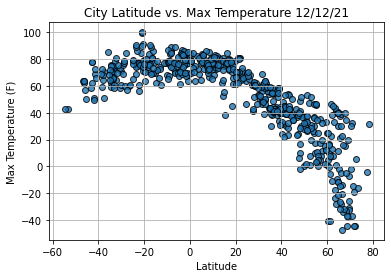

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

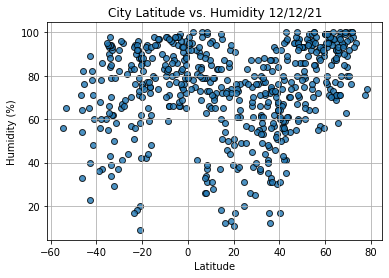

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

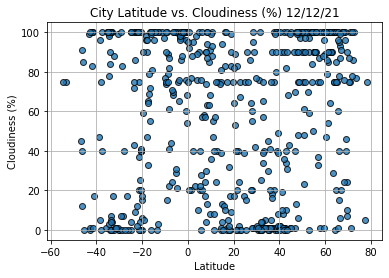

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

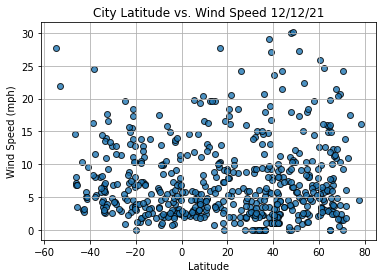

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                       Atuona
Country                        PF
Date          2021-12-13 02:32:50
Lat                          -9.8
Lng                     -139.0333
Max Temp                    78.94
Humidity                       80
Cloudiness                     74
Wind Speed                  17.49
Name: 13, dtype: object

In [39]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
559     True
560    False
561     True
562     True
563    False
Name: Lat, Length: 564, dtype: bool

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Margate,GB,2021-12-13 02:31:29,51.3813,1.3862,53.31,79,100,5.01
2,Nefteyugansk,RU,2021-12-13 02:32:46,61.0998,72.6035,7.05,99,85,6.13
5,Provideniya,RU,2021-12-13 02:28:54,64.3833,-173.3000,-9.29,70,0,15.66
7,Polunochnoye,RU,2021-12-13 02:32:48,60.8697,60.4153,9.73,93,100,2.82
9,Bosaso,SO,2021-12-13 02:32:48,11.2842,49.1816,72.82,79,0,4.74


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

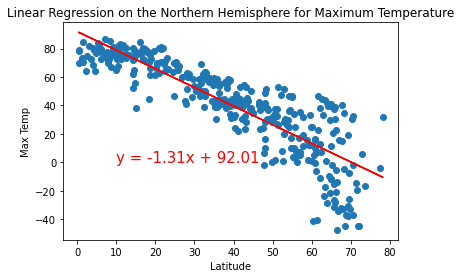

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,0))

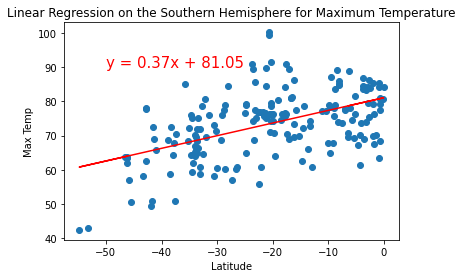

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

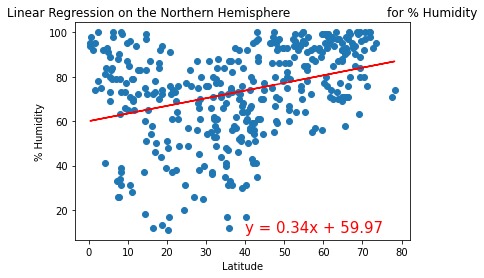

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

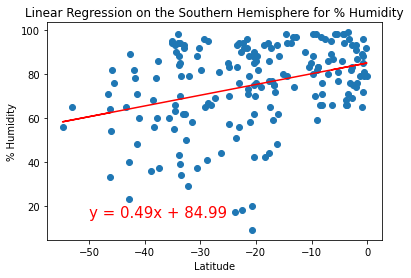

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

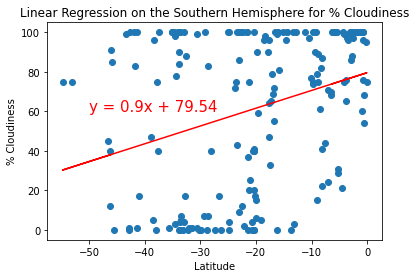

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

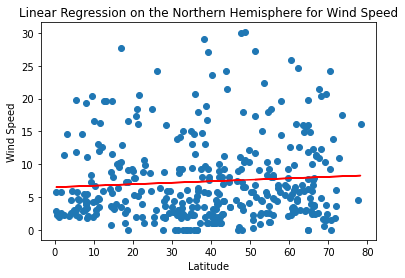

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

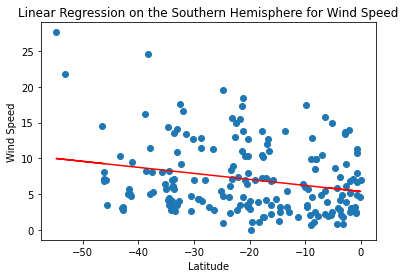

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))